# model visualization

c:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feat

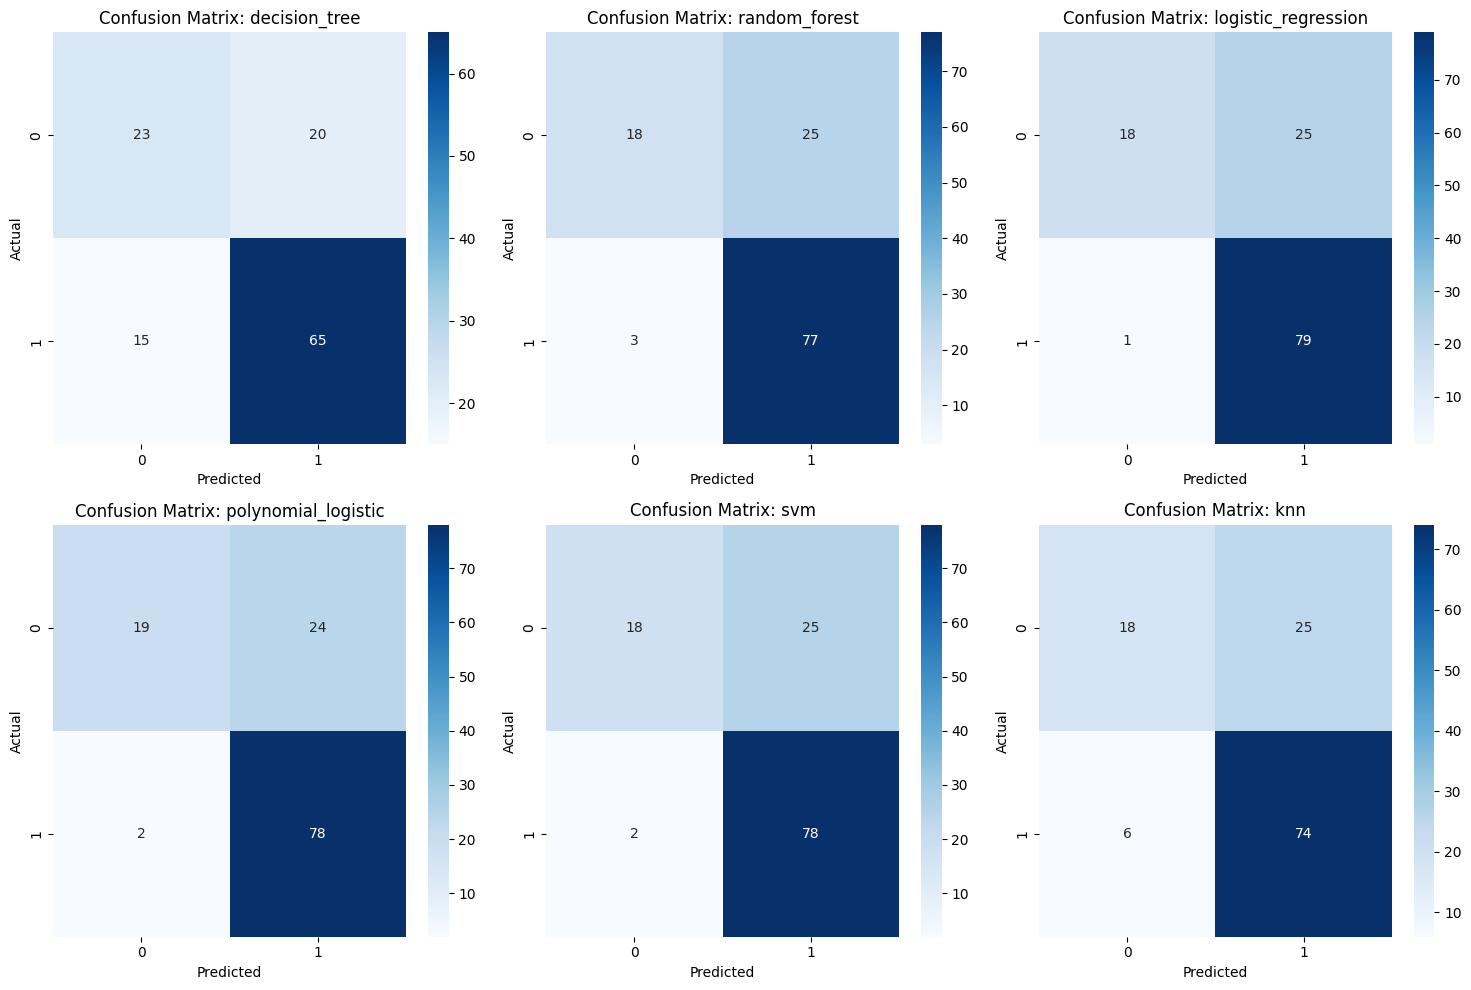

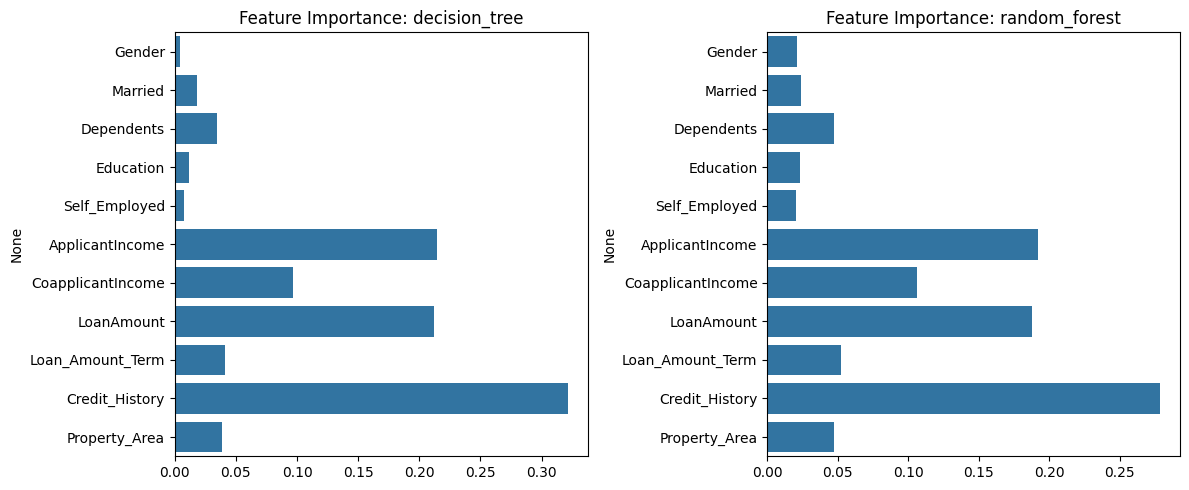

c:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feat

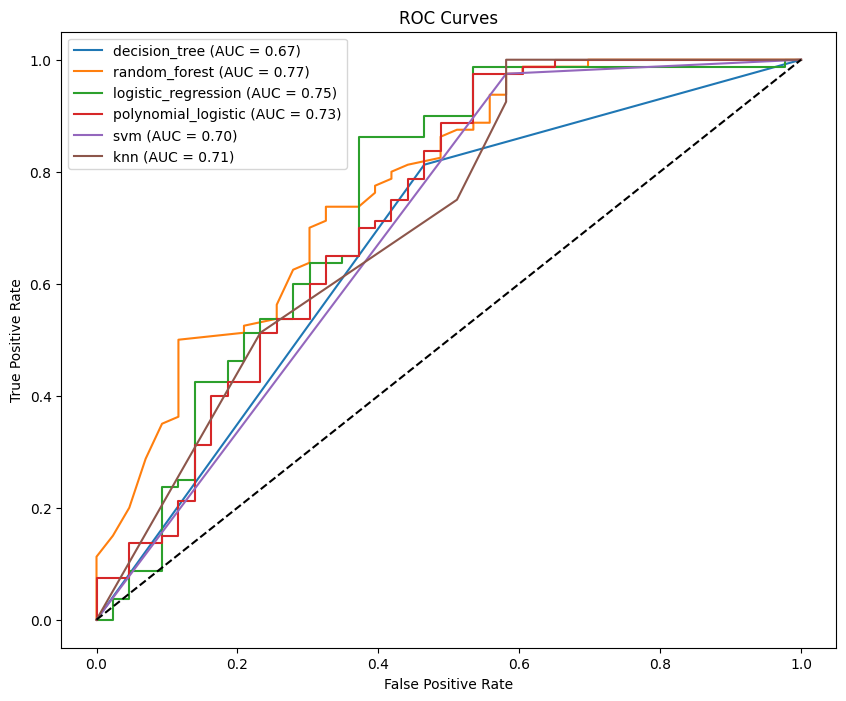

c:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feat

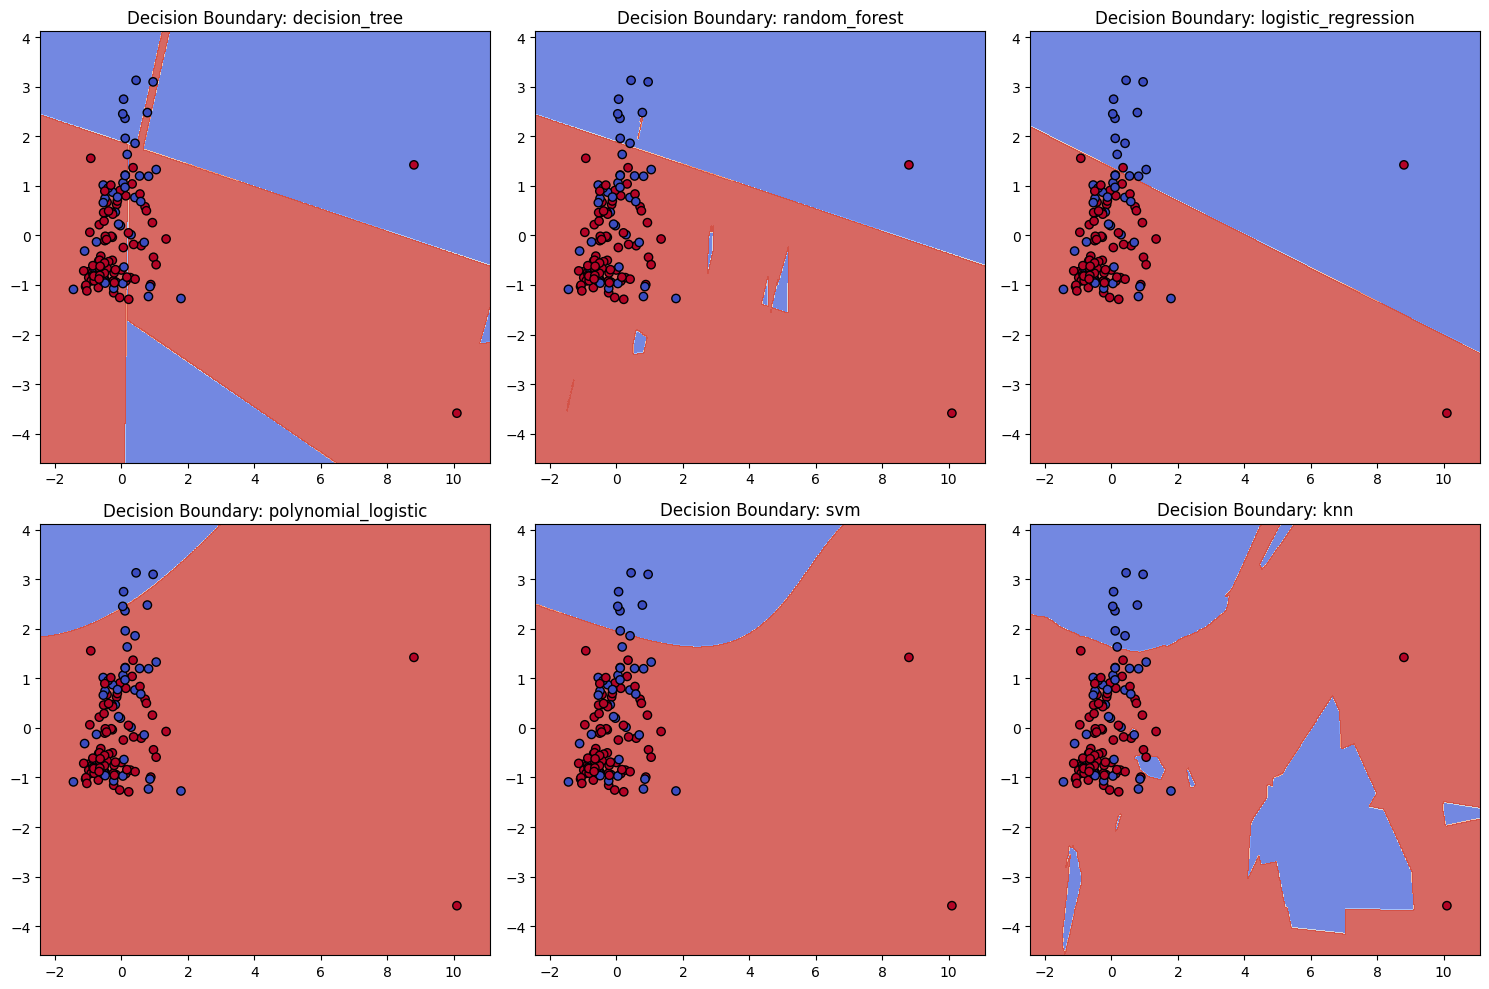

c:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
c:\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


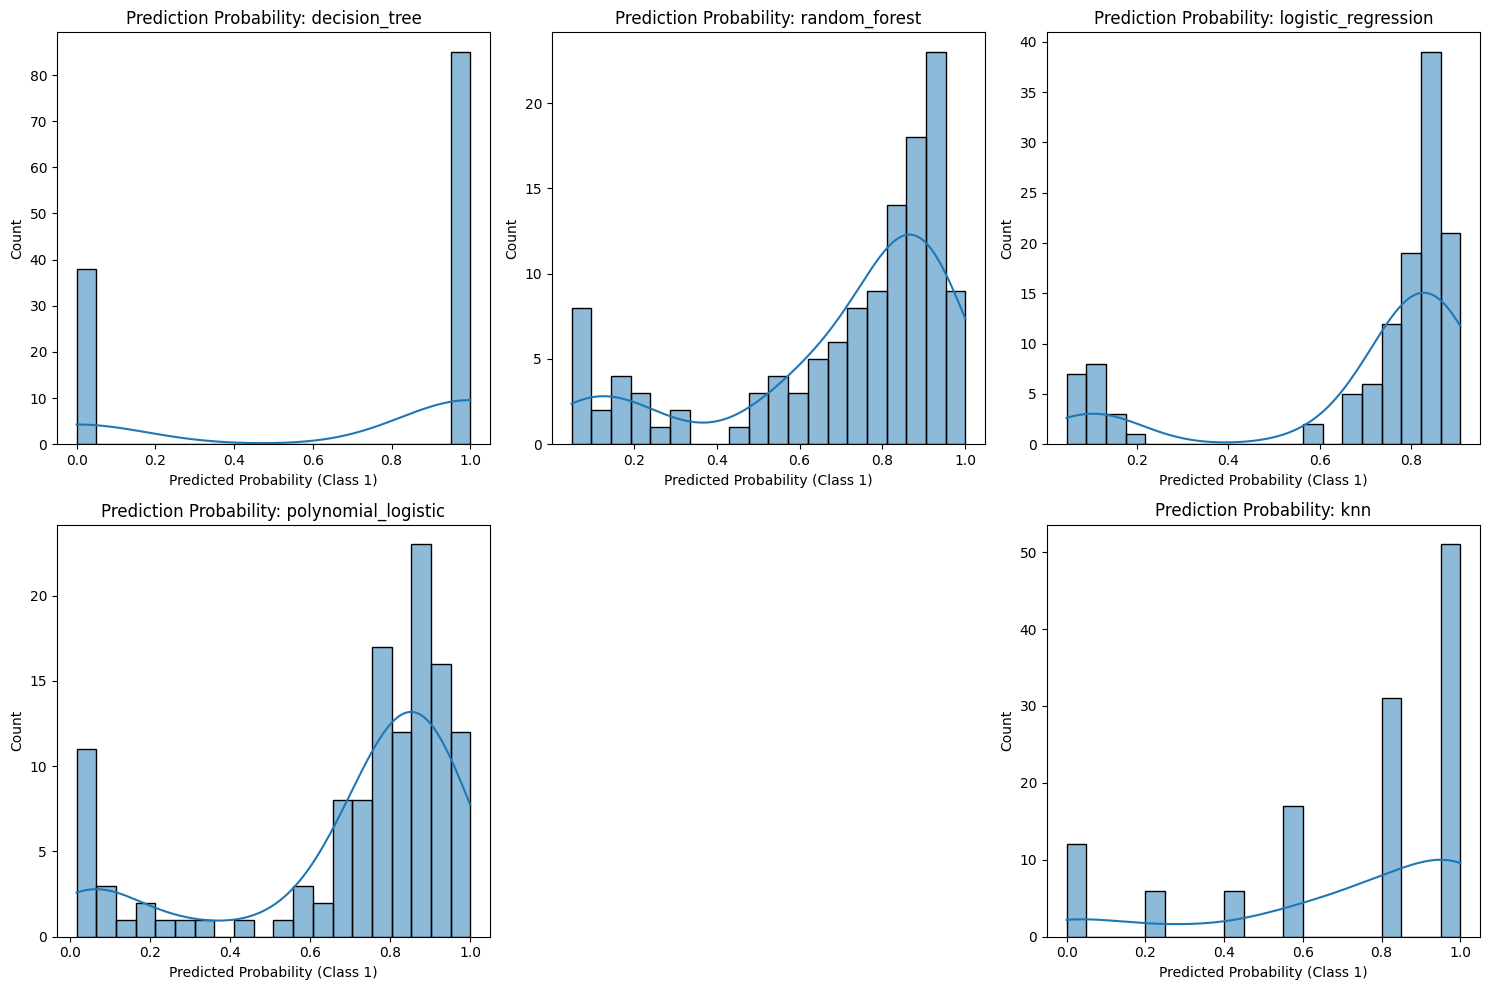

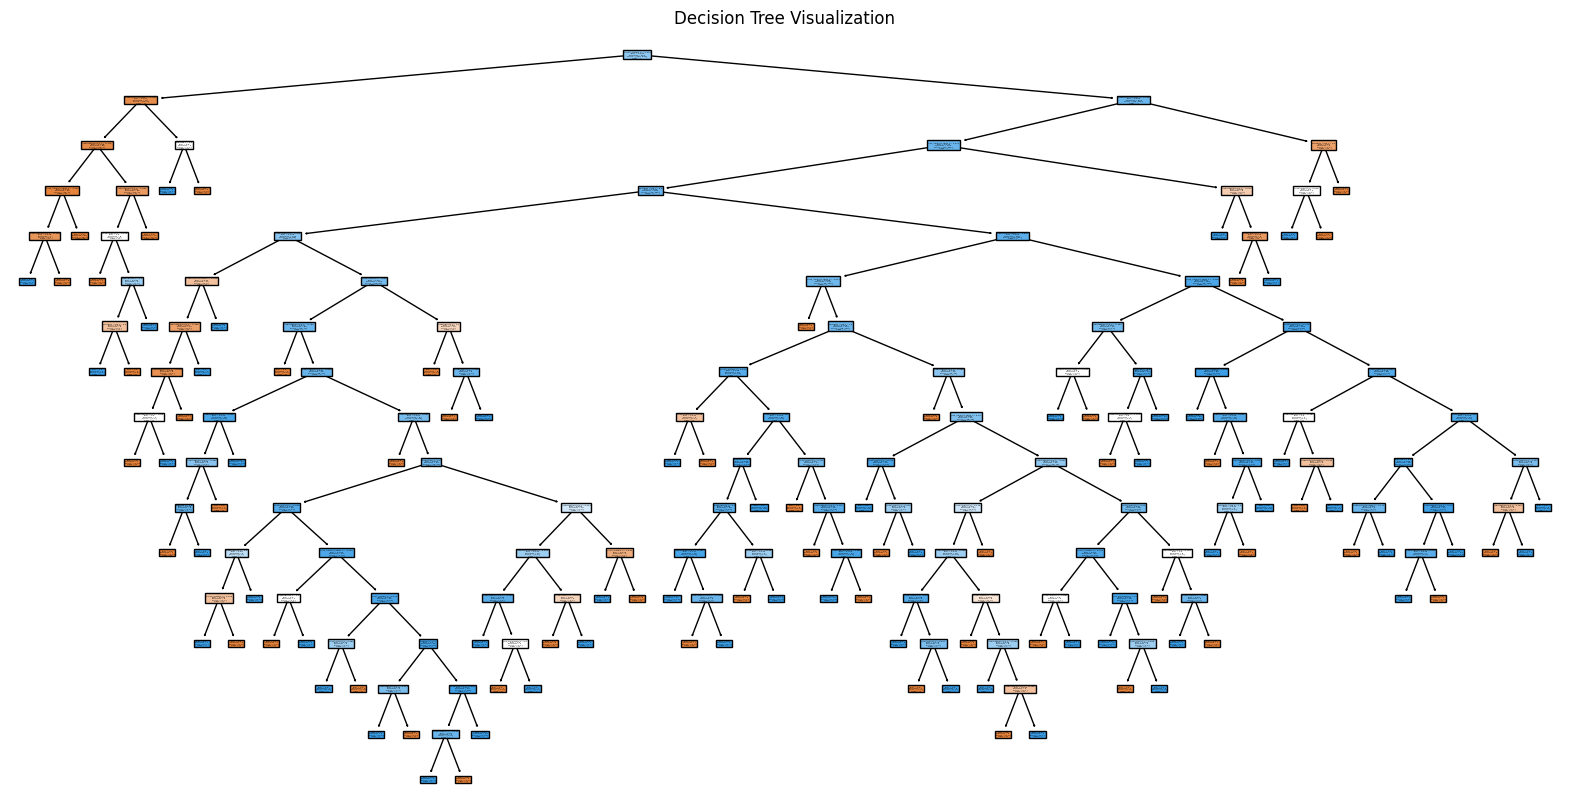

In [3]:
# Box 4: Model Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.decomposition import PCA
import pickle

# Load preprocessed data
df = pd.read_csv('preprocessed_loan_data.csv')
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model names
model_names = ['decision_tree', 'random_forest', 'logistic_regression', 'polynomial_logistic', 'svm', 'knn']

# 1. Confusion Matrix
plt.figure(figsize=(15, 10))
for i, name in enumerate(model_names, 1):
    with open(f'{name}.pkl', 'rb') as f:
        model = pickle.load(f)
    y_pred = model.predict(X_test.values)
    cm = confusion_matrix(y_test, y_pred)
    plt.subplot(2, 3, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# 2. Feature Importance (for Decision Tree and Random Forest)
plt.figure(figsize=(12, 5))
for i, name in enumerate(['decision_tree', 'random_forest'], 1):
    with open(f'{name}.pkl', 'rb') as f:
        model = pickle.load(f)
    importance = model.feature_importances_
    plt.subplot(1, 2, i)
    sns.barplot(x=importance, y=X.columns)
    plt.title(f'Feature Importance: {name}')
plt.tight_layout()
plt.show()

# 3. ROC Curve
plt.figure(figsize=(10, 8))
for name in model_names:
    with open(f'{name}.pkl', 'rb') as f:
        model = pickle.load(f)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test.values)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_prob):.2f})')
    else:
        y_pred = model.predict(X_test.values)
        fpr, tpr, _ = roc_curve(y_test, y_pred)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, y_pred):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

# 4. Decision Boundary (using PCA for 2D visualization)
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)
plt.figure(figsize=(15, 10))
for i, name in enumerate(model_names, 1):
    with open(f'{name}.pkl', 'rb') as f:
        model = pickle.load(f)
    h = 0.02  # step size in mesh
    x_min, x_max = X_test_pca[:, 0].min() - 1, X_test_pca[:, 0].max() + 1
    y_min, y_max = X_test_pca[:, 1].min() - 1, X_test_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)
    plt.subplot(2, 3, i)
    plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.8)
    plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, edgecolors='k', cmap='coolwarm')
    plt.title(f'Decision Boundary: {name}')
plt.tight_layout()
plt.show()

# 5. Prediction Probability Distribution
plt.figure(figsize=(15, 10))
for i, name in enumerate(model_names, 1):
    with open(f'{name}.pkl', 'rb') as f:
        model = pickle.load(f)
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test.values)[:, 1]
        plt.subplot(2, 3, i)
        sns.histplot(y_prob, bins=20, kde=True)
        plt.title(f'Prediction Probability: {name}')
        plt.xlabel('Predicted Probability (Class 1)')
        plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 6. Tree Visualization (for Decision Tree)
with open('decision_tree.pkl', 'rb') as f:
    dt_model = pickle.load(f)
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=['N', 'Y'], filled=True)
plt.title('Decision Tree Visualization')
plt.show()